# Problem Statement
The global fashion industry has a valuation of 3 trillion dollars and is 2% of the world's GDP. Companies are now trying to employ computer vision and machine learning techniques to help people find their new fashion. We will try to create a "virtual assistant" that will look at instagram images and classify what fashion category a person is wearing so that they can target marketing campaigns.

### Business Case and Main Objectives

We will be creating a model that will look at an image to classify a type of clothing into 10 classes: shorts, bags, dresses, etc. Our main objective is that once we tell from a customer that they seem to wear lots of dresses in their images, we can target our ads to them with new dresses. We will use a greyscaled image version of our class to remove the complexity of colors.

Amazon's new echo look takes photos of your wardrobe and then gives you the option of having a live view of a person wearing new dresses and then also uses machine learning to even recommend styles and decides the best fashion for what is in style and what the machine believes you would most likely enjoy wearing.

### Dataset and Machine Learning Model

Our dataset comes from https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/. This is a great replacement for the famous MNIST dataset on kaggle for handwritten digits, as this is far more interesting and the famous MNIST dataset is infamous for simple solutions that use one pixel to determine a digit. 

It contains 70,000 images and we will divide this into 60,000 training and 10,000 testing subsets. The images are $28\times28$ sized and grayscale. The 10 target classes are:

![title](https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png)

Classification Categories:

0. T-Shirt/Top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle
10. Boot

Each grayscale image is a system of 256 tones, with values 0-255. 0 is black, 255 is white. We can represent each pixel with a matrix of grayscale values, which can be represented in binary (e.g. 11111111 is the same decimal value as 255). Hence, each image is conveted into a table of $28\times28$ values, or rows of $784$ columns that each represent a pixel.

## Exploratory Data Analysis (EDA) and Visualization
#### Packages & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing our Dataset

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

#### EDA and Visualization

In [3]:
fashion_train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


We can see that our image is represented in our dataframe. Each row is an image that has been flattened into the $784$ columns of pixels.

In [4]:
shape = fashion_train_df.shape
print(f'We have {shape[0]} images in our training dataset')

We have 60000 images in our training dataset


In [5]:
shape = fashion_test_df.shape
print(f'We have {shape[0]} images in our testing dataset')

We have 10000 images in our testing dataset


In [6]:
training = np.array(fashion_train_df, dtype='float32') # Create our training matrix
testing = np.array(fashion_test_df, dtype='float32') # Create our testing matrix

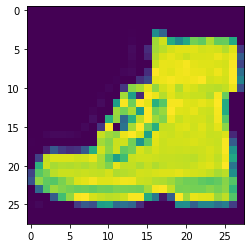

This image is category number 9


In [7]:
import random

i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28)) # Experiment with recreating an image in our dataset
plt.show()

label = training[i, 0]
print(f'This image is category number {label:1.0f}')

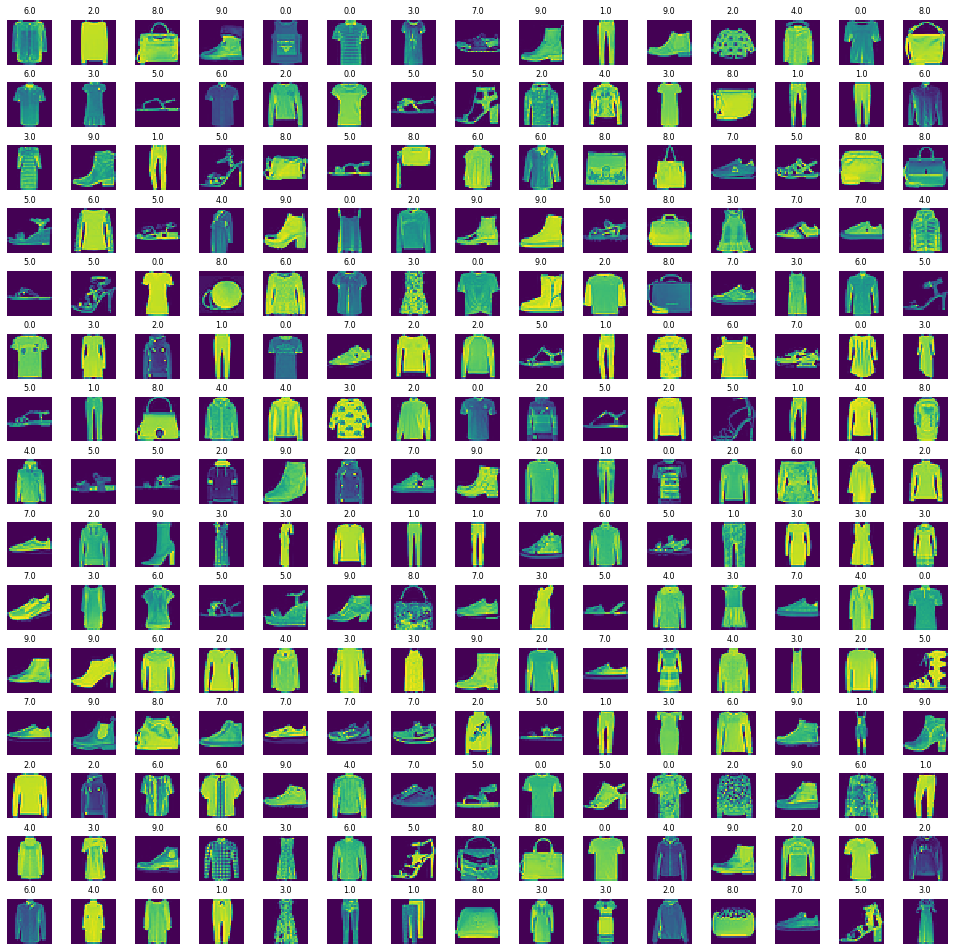

In [8]:
# Let's take a look at the more images in a grid format. Set image size:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() # Flatten our 15 x 15 matrix into a 225 array

n_training = len(training) # Get length of training dataset

for i in np.arange(0, W_grid * L_grid): # Loop through to make subplots
    index = np.random.randint(0, n_training) # Random Selection of Image
    axes[i].imshow(training[index,1:].reshape((28, 28))) # Show image of that random selection
    axes[i].set_title(training[index,0], fontsize=8) # Title and reduce font size 
    axes[i].axis('off') # Turn off unnecessary stuff

plt.subplots_adjust(hspace=0.4) # Set spacing size of each image

## Model Building: Convolutional Neural Network (CNN's)

We will use the idea behind ANN's (Artificial Neural Networks) to simulate how the human brain learns. We will have our pixels as the inputs and connect them to hidden layers to create our categorizing as the output (our 10 target classes). We can train the network to set weights for $28\times28$ pixels as inputs for our network. However, the main caveat here is we cannot treat images the same way we would with normal features in an ANN. Images need to have the spatial dependence preserved, that is, pixels are dependent on the pixels around it. This is why we will perform what is known as a Convolution Neural Network. This will add a Convolutional layer to be our feature detector, pool our results to a set of smaller features that have been filtered and then flatten them. Then we can feed them into our artificial neural network. This will be detailed throughout our module here.

### Creating & Training the Model

In [9]:
# Create Training and Testing Dataset
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

# Create a Validation Dataset to Prevent Overfitting and Help Generalize
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

#### Convolution
We will use a kernel matrix to scan our image and filter the image to obtain a certain effect. This is known as a feature detector, a sort of filter, to create our new image (e.g. our feature detector might be an image sharpener or a image blurer). This creates what is known as feature maps, a boiled down matrix of our image. For example, if we wanted to blur our image, we can use a kernel matrix that averages our pixels. All of this is known as convolution.

In [10]:
# Reshape our data, our rows, into 28 x 28 matrices for our convolution
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [11]:
print(X_train.shape) # Check if we did it correctly
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#### Convolution
We will use a kernel matrix to scan our image and filter the image to obtain a certain effect. This is known as a feature detector, a sort of filter, to create our new image (e.g. our feature detector might be an image sharpener or a image blurer). This creates what is known as feature maps, a boiled down matrix of our image. For example, if we wanted to blur our image, we can use a kernel matrix that averages our pixels. All of this is known as convolution.

In [21]:
# Convolution
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

#### Pooling & Flattening
After our feature detection process, our convolution, we apply what is known RELU function. This adds non-linearity to our feature map, and enhanecs the sparsity or scatterness of our feature map. The advantage of doing this is make our image as sparse as possible. We want specific features in our image to really pop out and this is what pooling helps us do, instead of having "hills" and "valleys" in our pixels. We would do this instead of using a sigmoid function, since we want to avoid saturation in our images (it would mean their features don't pop out as much). 

We will then do something known as max pooling. We will apply a $2\times2$ filter on our results to reduce the dimensionality of our feature map one more time to reduce the size of our matrix (e.g. $4\times4$ would become $2\times2$. More importantly, we can allow our model to generalize our result (e.g. it can now use our result to classify fashions that might be slightly different, like a bag slighlty shifted to the right or left).

Finally, we will flatten our matrix into a row of inputs so that we can now input it into artificial neural network.

In [22]:
# Max Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
# Flattening
cnn_model.add(Flatten())

In [24]:
# Add Dense Function
cnn_model.add(Dense(units=32, activation='relu')) # a hidden layer between outputs

# Output Layer
cnn_model.add(Dense(units=10, activation='sigmoid')) # final output layer of our network

# Dropout


In [26]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
epochs = 50
cnn_model.fit(X_train, y_train, 
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data = (X_validate, y_validate))

C:\Users\edcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 11s 237us/step - loss: 0.9620 - accuracy: 0.6473 - val_loss: 0.5250 - val_accuracy: 0.8142
Epoch 2/50
48000/48000 [==============================] - 11s 230us/step - loss: 0.4790 - accuracy: 0.8351 - val_loss: 0.4349 - val_accuracy: 0.8521
Epoch 3/50
48000/48000 [==============================] - 10s 214us/step - loss: 0.4206 - accuracy: 0.8534 - val_loss: 0.4123 - val_accuracy: 0.8568
Epoch 4/50
48000/48000 [==============================] - 11s 221us/step - loss: 0.3822 - accuracy: 0.8662 - val_loss: 0.3767 - val_accuracy: 0.8698
Epoch 5/50
48000/48000 [==============================] - 10s 209us/step - loss: 0.3660 - accuracy: 0.8723 - val_loss: 0.3776 - val_accuracy: 0.8648
Epoch 6/50
48000/48000 [==============================] - 10s 209us/step - loss: 0.3494 - accuracy: 0.8771 - val_loss: 0.3491 - val_accuracy: 0.8787
Epoch 7/50
48000/48000 [==============================] 

## Model Evaluation

In [32]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {evaluation[1]:.3f}')

10000/10000 [==============================] - 1s 96us/step
Test Accuracy: 0.912


#### Visual Way of Evaluating (Cool!)

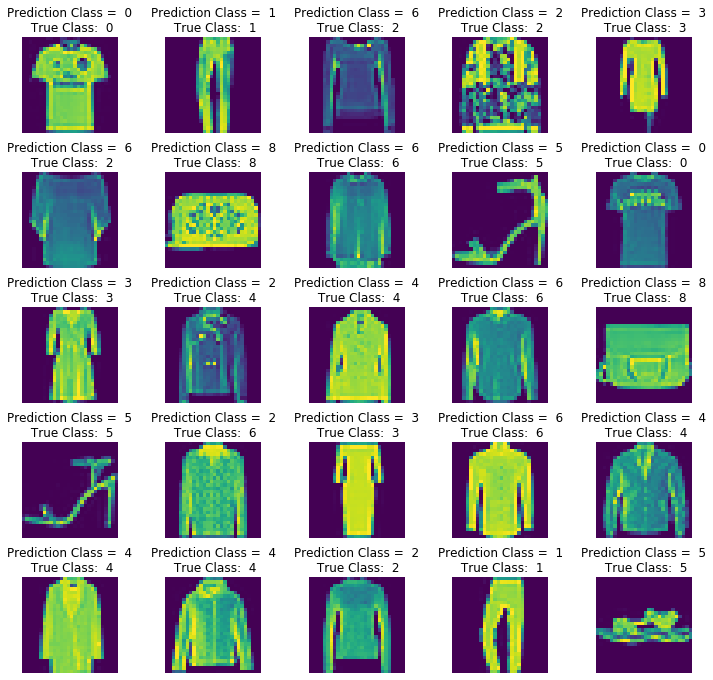

In [41]:
predicted_classes = cnn_model.predict_classes(X_test)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title(f'Prediction Class = {predicted_classes[i]:2.0f}\n True Class: {y_test[i]:2.0f}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

#### Confusion Matrix

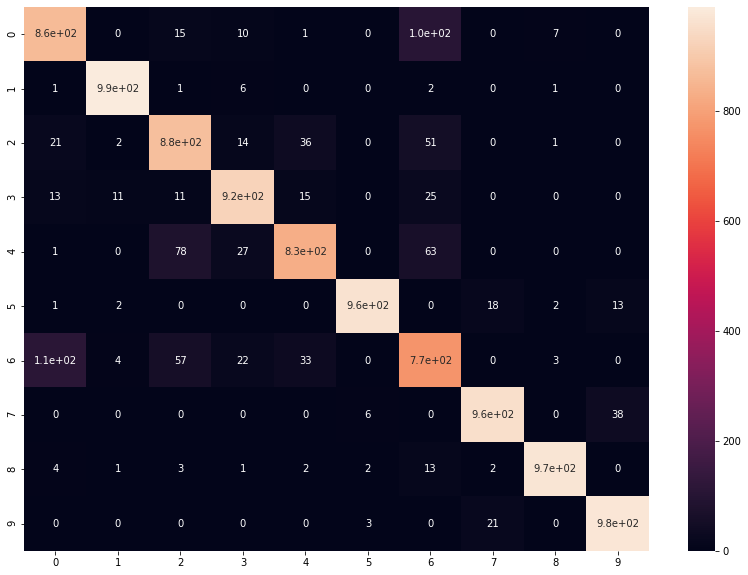

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot=True)

# Fixing python's update for cutting off top and bottom part of heatmap (stupid matplotlib!)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

So we can see that we still have quite a number of classes that are classified incorrectly, namely class 4 being classified as class 2 and class 6 being classified as class 2 (that is shirts and pullovers and coats and pullovers).

In [52]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f'Class {i}' for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.84      0.88      0.86      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.91      0.83      0.87      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.75      0.77      0.76      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Class 6 (coats), class 2 (pullovers), and class 0 (t-shirts) seem to be giving our CNN some trouble. Let's try to do some final improvements to our model.

## Improvements to our model
We can incraese the number of kernel matrices as feature detectors from 32 to 64 (the filters). The other thing we can do is use what is known as dropouts. The technique removes units from our neural networks during the training, remove some of the dependency on neurons for the sake of the rest of the learning. We make the network more general and better match our data. Neurons sometimes develop a co-dependency on each other, and this is why dropping out some neurons will benefit us to reduce overfitting (i.e. regularization technique).

Another way is to train our dataset on "richer" data, like texture, fabric, shape, and color. A great dataset of interest to do in the future is the deepfashion dataset.